In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import glob 
import tensorflow as tf

In [2]:
images_path = "/kaggle/input/plant-pathology-2020-fgvc7/images/*"
train_csv_path = "/kaggle/input/plant-pathology-2020-fgvc7/train.csv"

In [3]:
count = 0
for file in glob.glob(images_path):
    count += 1
print(f"Total Number of Images = {count}")

Total Number of Images = 3642


In [4]:
train_df = pd.read_csv(train_csv_path)
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [6]:
print(f"Total no. of images for taining = {train_df.shape[0]}")
print()
print(f"Total no. of classes is = {train_df.columns.value_counts().sum() - 1}")
print()
print(f"Classes = {train_df.columns[1:].values}")
print()
print(f"Average Images per class = {train_df.shape[0]/train_df.columns.value_counts().sum() - 1}")

Total no. of images for taining = 1821

Total no. of classes is = 4

Classes = ['healthy' 'multiple_diseases' 'rust' 'scab']

Average Images per class = 363.2


In [7]:
train_df.isnull().sum()

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64

In [8]:
sample_healthy = train_df.loc[train_df['healthy'] == 1 , [ 'image_id' ] ].sample(7).values
sample_scab = train_df.loc[train_df['scab'] == 1 , [ 'image_id' ] ].sample(7).values
sample_rust = train_df.loc[train_df['rust'] == 1 , [ 'image_id' ] ].sample(7).values
sample_multiple_diseases = train_df.loc[train_df['multiple_diseases'] == 1 , [ 'image_id' ] ].sample(7).values

In [9]:
def plot_leafs(samples,classes):
    plt.subplots(1,7,figsize = (15,15))
    i = 1
    for sample in samples:
        img = tf.keras.utils.load_img(f"/kaggle/input/plant-pathology-2020-fgvc7/images/{sample[0]}.jpg",
                                      target_size=(224,224))
        plt.subplot(1,7,i)
        plt.imshow(img)
        plt.title(classes,color = 'red')
        plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)
        i += 1

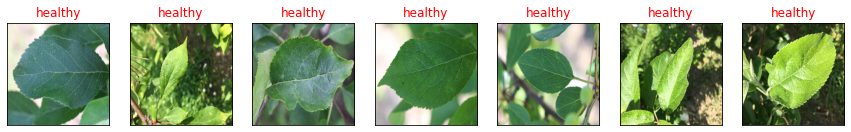

In [10]:
plot_leafs(sample_healthy,"healthy")

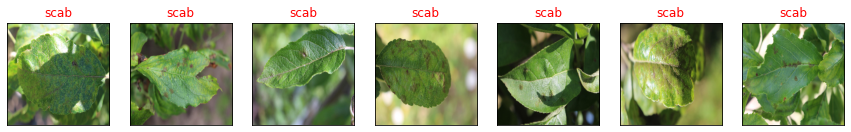

In [11]:
plot_leafs(sample_scab,"scab")

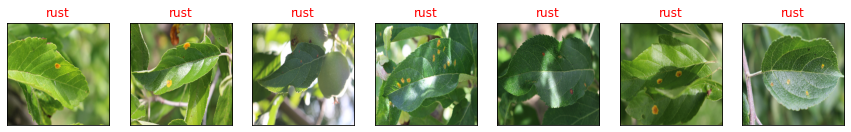

In [12]:
plot_leafs(sample_rust,"rust")

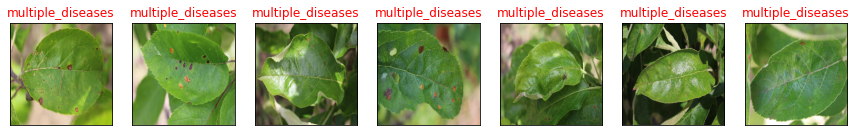

In [13]:
plot_leafs(sample_multiple_diseases,"multiple_diseases")

In [14]:
healthy_count = train_df.healthy.sum()
scab_count = train_df.scab.sum()
rust_count = train_df.rust.sum()
multiple_diseases_count = train_df.multiple_diseases.sum()

counts = [healthy_count, scab_count, rust_count, multiple_diseases_count]
classes = train_df.columns.values[1:]

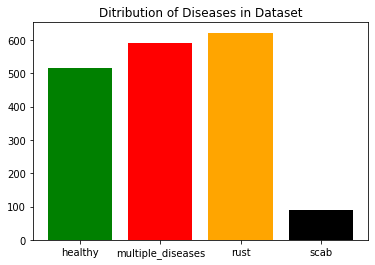

In [15]:
plt.bar(classes,height = counts,color = ['green', 'red','orange','black'])
plt.title("Ditribution of Diseases in Dataset")
plt.show()

There are 1821 images in the dataset that can be used to train the model, from the above distribution we can see that the images for scab diseases is very less and can create a bias for the other classes hence making it difficult to identify the scab diseases in plant, The average number of images per class is around 350 but the scab disease have just 100 images. Scab diseases as seen above is a black patch on the leaves where as rust are orange spots with holes in the leaves , the combination of these two is the class multiple diseases.


We can load the entire train data into the ram as we have 15 GB ram which is sufficeint to fit the data in memory and train a complex model, also we have two GPUs availabe with us, so we will not require datagenarators for this problem we can utilize the load_img utility from keras to load the images from disk into ram.

First we will build a simple model with two convolution layer and two dense layer to see the perfomance of a basic model if it can learn from data.

We will do data augmentation on the dataset to create variations of the available images so that the model can generalize on the available data.

We will keep on adding different layers on the basic model to make it more and more efficient and try to imporve its performance by tuning various hyper parameters such as learning rate , dropout rate and number of filters.

